### Exercise sheet 3

Cüneyt Erem
3277992
s6cuerem@uni-bonn.de

Nkeh Victor Ndiwago
3504121
s0vinkeh@uni-bonn.de

Paula Romero Jiménez
3320220
s0parome@uni-bonn.de

------------------------------------------------

ex1))

------------------------------------------------

1)) You want to predict whether a patient will develop lung cancer, and you are given the years of smoking as well as their age as a feature.Considering the equation of the logistic regression,what are X and Y in this case? 

The independent (predictor) variable  X  is  the years of smoking and age
The dependent variable Y is lung cancer


------------------------------------------------

2)) What  are  the  outputs  of  the logistic  model  and  the  logistic  function?  What  are  their ranges?  

logistic function;

$ p(x) = \dfrac{1}{1+\exp-(\beta_0 + \beta1x)} $
 
logistic regression model, log likelihhod will be;

l(x) = $\sum_{k=1}^{K} {y_k \log_b p(x_k)} + \sum_{k=1}^{K} { (1 - y_k) \log_b (1 - p(x_k))}$


logistic function models probabilities p(X) using a function that gives outputs between 0 and 1 that is 0<p(x)<1.

Same range is for logistic regression model as between 0 and 1 that is 0<l(x)<1

------------------------------------------------

3)) 

We want to assess the statisticalsignificance of the predictor mean radius. Let us say we have two different models to estimate the target variable:
Model 1 has all nine predictor variables.
Model 2 has eight predictor variables, all but the ‘mean radius’.
What is our null hypothesis here? 
Which statistical test would you apply to compare the fit of the two models? 
Which result of the statistical test would let you conclude whether the predictor variable ‘mean radius’ is statistically significant or not?

-we want to determine wether there is a significant difference in the two models one with the predictor mean radius and the other without.
-Null Hypothesis:all regression coefficients are zero (differences in group mean) .
-The ANOVA-Ftest
-The p-value is used to conclude.A low p-value <0.05 means we reject the null hypothesis.in other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

------------------------------------------------

4)) Which assumptions have to be fufilled to apply logistic regression? are they fufilled in this example?

-Fitting of logistic regression models is done in an iterative process(Newton-Raphson method)-Non-convergence may occur due to violation of model assumptions:Linear class separation possible with not too large class overlap.  No colinearities among regressor variables

------------------------------------------------

ex2))

------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm

#### 1. Data correlation

_a. Load the raw Diabetes CSV file onto your notebook, which its data has not
been standardized (file: diabetes_raw.csv). Create separate dataframes for the target variable (“Y”) and the input variables (all columns except “Y”). Examine the correlation properties between the input variables by plotting a correlation heatmap using the Pandas corr() function and the Seaborn heatmap() function. (1P)_

In [2]:
diabetes = pd.read_csv('diabetes_raw.csv')
diabetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
diabetes_target = pd.DataFrame(diabetes, columns=['Y'])
diabetes_target.head()

,Y
0,151
1,75
2,141
3,206
4,135


In [4]:
diabetes_input = pd.DataFrame(diabetes, columns=['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6'])
diabetes_input.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [5]:
diabetes_input.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


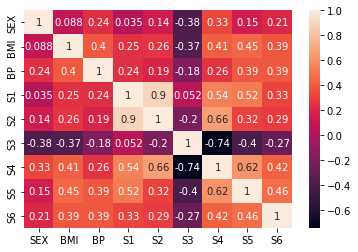

In [6]:
sns.heatmap(diabetes_input.iloc[:,1:].corr(), xticklabels=diabetes_input.iloc[:,1:].columns, yticklabels=diabetes_input.iloc[:,1:].columns, annot=True)

_b. Observe the variable “S3” (high-density lipoproteins) at the correlation plot. Which variable has the strongest positive correlation with it, and which variable has the strongest negative correlation with it? (1P)_

The variable with the strongest positive correlation with S3 is S1, and with the strongest negative correlation is S4.

------------------------------------------------

#### 2. Data standardization

_a. Read this article to learn more about when and why we need to standardize variables in a regression model: https://statisticsbyjim.com/regression/standardize-variables-regression/. (1P)_

_b. Scale the range of the Diabetes dataset using the Sklearn StandardScaler() function. Perform two linear regression analysis using the Statsmodels OLS function: one for the standardized, and one for the non-standardized datasets. Which differences do you observe at the outcome summary? Explain the reasons behind these differences. (2P)_

In [7]:
from sklearn import preprocessing
import statsmodels.api as sm

In [8]:
X = diabetes[['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6']]
Y = diabetes[['Y']]
model = sm.OLS(Y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              372.3
Date:                Tue, 03 May 2022   Prob (F-statistic):                   2.76e-205
Time:                        22:49:35   Log-Likelihood:                         -2398.3
No. Observations:                 442   AIC:                                      4817.
Df Residuals:                     432   BIC:                                      4857.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
scaler = preprocessing.StandardScaler()

# standardization of dependent variables
diabetes_scaled = scaler.fit_transform(diabetes_input) 
diabetes_target_scaled = scaler.fit_transform(diabetes_target)

new_model = sm.OLS(diabetes_target_scaled,diabetes_scaled).fit()
print(new_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.518
Model:                            OLS   Adj. R-squared (uncentered):              0.507
Method:                 Least Squares   F-statistic:                              46.38
Date:                Tue, 03 May 2022   Prob (F-statistic):                    2.68e-62
Time:                        22:49:35   Log-Likelihood:                         -466.00
No. Observations:                 442   AIC:                                      952.0
Df Residuals:                     432   BIC:                                      992.9
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                        non-standardized:                standardized

    Adj. R-squared:         0.896                            0.518         

    F statistic prob:       2.76e-205                        2.68e-62       

The most significant difference we observe is in the standard errors and the coefficients. In the standarized data, the standard error has decreased significantly in SEX, S4 and S5, as well as all the coefficients. Overall, we see a more homogeneous data. Almost every values have less p values after standardized

One of the reasons of this is that the standarization is transforming the units of the regression coefficients so that standardization makes the variables be in the same scale.

------------------------------------------------

#### 3. Data transformation

_a. One of the important assumptions of linear regression is that the model
residuals are normally distributed. There are some data transformation techniques to fix the issue of non-normality of model residuals, such as the Box-Cox transformation. Explain how this technique works. State one of the benefits of transforming non-normal variables into a normal shape. (2P)_

The Box-Cox transformation transforms our data so that it closely resembles a normal distribution. That way, if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

Box-Cox Transformation converts non-normal data to normal data by raising the distribution to a power of lambda (λ). The algorithm can automatically decide the lambda (λ) parameter that best transforms the distribution into normal distribution. The lambda (λ) parameter has a range of -5 < λ < 5.


The main benefit is the fact of achieving real and truthful conclusions when performing tests on the data. The errors after modeling should be normal to draw a valid conclusion by hypothesis testing.

------------------------------------------------

#### 4. Confounding variables

_a. The presence of confounding variables affects the variables being studied,
which causes the result to not reflect the actual relationship between the variables. Read this article to learn more about confounding variables: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/. (1P)_

_b. Briefly describe how would you use linear regression to adjust for the confounding effects of age and gender in the Diabetes dataset. (1P)_

Regression analysis describes how the changes in each independent variable are related to changes in the dependent variable. When you perform regression analysis, you need to isolate the role of each variable.

To accomplish this goal, you must minimize the effect of confounding variables. Regression analysis does this by estimating the effect that changing one independent variable has on the dependent variable while holding all the other independent variables constant.

Age and gender are frequent confounders, so an adjustment is needed in order to avoid these confounding effects. 

Adjustment for age or gender involves a computational procedure to mimic a situation in which the men and women in the data set were of the same age or gender. This computation eliminates the influence of age/gender on the treatment effect.

Therefore, a multivariable regression analysis allows the study of multiple independent variables at the same time, with adjustment of their regression coefficients for possible confounding effects between variables.

------------------------------------------------

ex3))

------------------------------------------------

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [11]:
dataset = pd.read_csv("mlr_vma.csv",sep=';')
dataset.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,0,-47.917424,1.356240,0.744463,-0.645120,-0.454320,0.361636,-1.196207,0.812526,-0.185659,-1.106335
1,1,146.564877,0.110923,0.264041,-0.291694,0.507493,-0.600639,-1.424748,-0.544383,-0.225776,0.067528
2,2,-21.967189,-0.501757,-0.383730,0.513267,0.578153,-0.529760,-0.518270,-0.808494,0.357113,1.477894
3,3,32.408397,0.931280,-0.670939,0.975545,-0.713919,0.331263,0.611676,1.031000,-0.385082,-0.676922
4,4,73.846658,-0.719844,1.716209,-1.763040,-0.688602,0.343618,-0.301104,-1.478522,0.171368,-0.115648


------------------------------------------------

1))

------------------------------------------------

There are three assumptions of linear regression

1- Model residuals are normally distributed

2- p < n (fewer regressors/variable/feature than data points/observation) 

3- no collinearities

------------------------------------------------

2))

------------------------------------------------

a)

In [12]:
df = pd.DataFrame(dataset.iloc[:, 1:])
R1 = np.corrcoef(df, rowvar=False)
print(R1)

[[ 1.          0.12497988  0.05908911 -0.07497015 -0.32934373  0.26737311
   0.27464886 -0.2414412  -0.2576009   0.04065293]
 [ 0.12497988  1.          0.15025429 -0.05293082 -0.49916974  0.53704704
   0.25569712  0.11354459 -0.36369279 -0.33602962]
 [ 0.05908911  0.15025429  1.         -0.99024272 -0.19537037  0.24703481
  -0.02821149 -0.78376515  0.13370814 -0.15894425]
 [-0.07497015 -0.05293082 -0.99024272  1.          0.1608018  -0.2107795
   0.09833535  0.76700661 -0.15910737  0.16973281]
 [-0.32934373 -0.49916974 -0.19537037  0.1608018   1.         -0.98408529
  -0.49015468 -0.01742893  0.21221458  0.54270776]
 [ 0.26737311  0.53704704  0.24703481 -0.2107795  -0.98408529  1.
   0.40281321 -0.02598373 -0.24641039 -0.53187612]
 [ 0.27464886  0.25569712 -0.02821149  0.09833535 -0.49015468  0.40281321
   1.         -0.16696175  0.21788207  0.09197533]
 [-0.2414412   0.11354459 -0.78376515  0.76700661 -0.01742893 -0.02598373
  -0.16696175  1.         -0.13744055 -0.3758909 ]
 [-0.2576

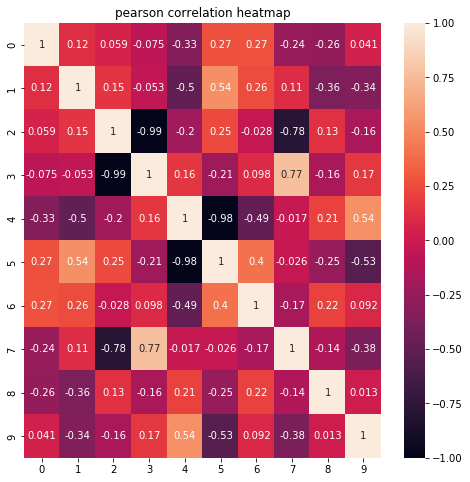

In [13]:
plt.figure(figsize=(8, 8))
spearman_heatmap = sns.heatmap(df.corr(method = 'pearson'), vmin=-1, vmax=1, annot=True)
spearman_heatmap.set_title('pearson correlation heatmap');

b)

In [14]:
from scipy.stats import shapiro

df = pd.DataFrame(dataset.iloc[:, 1:])

test_df = np.random.normal(loc=20, scale=5, size=(10, 10))
stat, p = shapiro(test_df)
print(p)

0.47318804264068604


0-

p > 0.05 so it is normally distributed

1- 

p = n (regressors/variable/feature = data points/observation) 

but should be p < n   -> this assumption is violated 

2-

there is colinearities between 2 and 3 (-0.99)

but should be no collinearities   -> this assumption is violated 

c)

In [15]:
df

,0,1,2,3,4,5,6,7,8,9
0,-47.917424,1.356240,0.744463,-0.645120,-0.454320,0.361636,-1.196207,0.812526,-0.185659,-1.106335
1,146.564877,0.110923,0.264041,-0.291694,0.507493,-0.600639,-1.424748,-0.544383,-0.225776,0.067528
2,-21.967189,-0.501757,-0.383730,0.513267,0.578153,-0.529760,-0.518270,-0.808494,0.357113,1.477894
3,32.408397,0.931280,-0.670939,0.975545,-0.713919,0.331263,0.611676,1.031000,-0.385082,-0.676922
4,73.846658,-0.719844,1.716209,-1.763040,-0.688602,0.343618,-0.301104,-1.478522,0.171368,-0.115648
5,-60.170661,-1.220844,-0.243689,0.196861,1.215729,-1.328186,-1.057711,0.822545,1.852278,-0.013497
6,36.139561,0.821903,2.303411,-1.987569,-0.294327,0.091761,1.564644,-2.619745,1.538037,-0.035826
7,-46.341769,-0.562288,1.565791,-1.412304,0.970874,-0.908024,-1.913280,-1.724918,-0.465730,0.241962
8,9.707755,-1.463515,0.140692,-0.234587,-0.186718,0.005113,-0.327662,-0.392108,0.968645,-0.702053
9,49.671415,-0.234137,-0.434048,0.542560,0.187014,-0.469474,1.523030,-0.234153,-0.138264,0.647689


In [16]:
df = df.drop(['3', '5'], axis=1)

columns 2 and 3 are colinear, columns 4 and 5 are colinears, 

so discarded col 3 and 5 not to be colinear

In [17]:
df.shape

(10, 8)

n: 10 observations > p: 8 features

so p < n holds

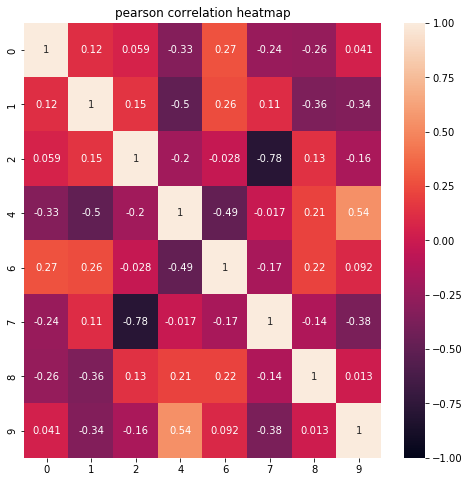

In [18]:
plt.figure(figsize=(8, 8))
spearman_heatmap = sns.heatmap(df.corr(method = 'pearson'), vmin=-1, vmax=1, annot=True)
spearman_heatmap.set_title('pearson correlation heatmap');

------------------------------------------------

3))

------------------------------------------------

In [19]:
dataset2 = pd.read_csv("y_mlr_vma.csv",sep=';')
df2 = pd.DataFrame(dataset2.iloc[:, 1:])
df2.head()

,y
0,-37.395291
1,57.080023
2,15.940968
3,-2.437328
4,32.772880


In [20]:
x = sm.add_constant(df)

result = sm.OLS(df2, x).fit()

d)

In [21]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.070e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):            0.00441
Time:                        22:49:39   Log-Likelihood:                 14.388
No. Observations:                  10   AIC:                            -10.78
Df Residuals:                       1   BIC:                            -8.053
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0399      0.078      0.514      0.6

/home/cuneyt/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


as it can be seen in the model summary, R-square and Adjusted R square values are 1.0, some of the p > 0.05 which are normally distributed, some of p < 0.05 which are correlated

e)

model performed well because R-squared is 1.0 which means our model explains 100.0% of the change in our ‘y’ variable accurately. F statistics probability is 0.00441% meaning that accuracy of the null hypothesis has this rate of chance. 

f)

values 0 and 8 have p < 0.05 having significants when we apply 2c by discarding values of 3 and 5. If we do not discard colinearitis and apply n > p values, then all result.summary() gives us nothing because assumptions do not hold, so applying 2c is important to get summary results correctly

g)

to select informative features, we need to look at coefficients that how change in that variable affects the independent variable. Also their p values are less than 0.05 or close to 0.05

(after applying 2c, discarding column 3 and 5)

value: 0, coeff: 0.4180, P>|t|1: 0.002

value: 8, coeff: 21.6424, P>|t|1: 0.003

value: 9, coeff:11.6124, P>|t|1: 0.010

so these 3 columns (0, 8 and 9) are most informative ones, rest can be considered as noise. 

------------------------------------------------